In [17]:
using PlotRecipes
pyplot(ma=0.8,lc=:white,mc=:white,size=(1000,800))
theme(:dark)
kw = Plots.makekw(fontsize=11, shorten=0.2, axis_buffer=0.05)

Dict{Symbol,Any} with 3 entries:
  :axis_buffer => 0.05
  :fontsize    => 11
  :shorten     => 0.2

In [18]:
code = :(
function add_ast(adjlist, names, ex::Expr, parent_idx)
   idx = length(names)+1
   push!(names, string(ex.head))
   push!(adjlist, Int[add_ast(adjlist, names, arg, idx) for arg in ex.args])
   idx
end
);


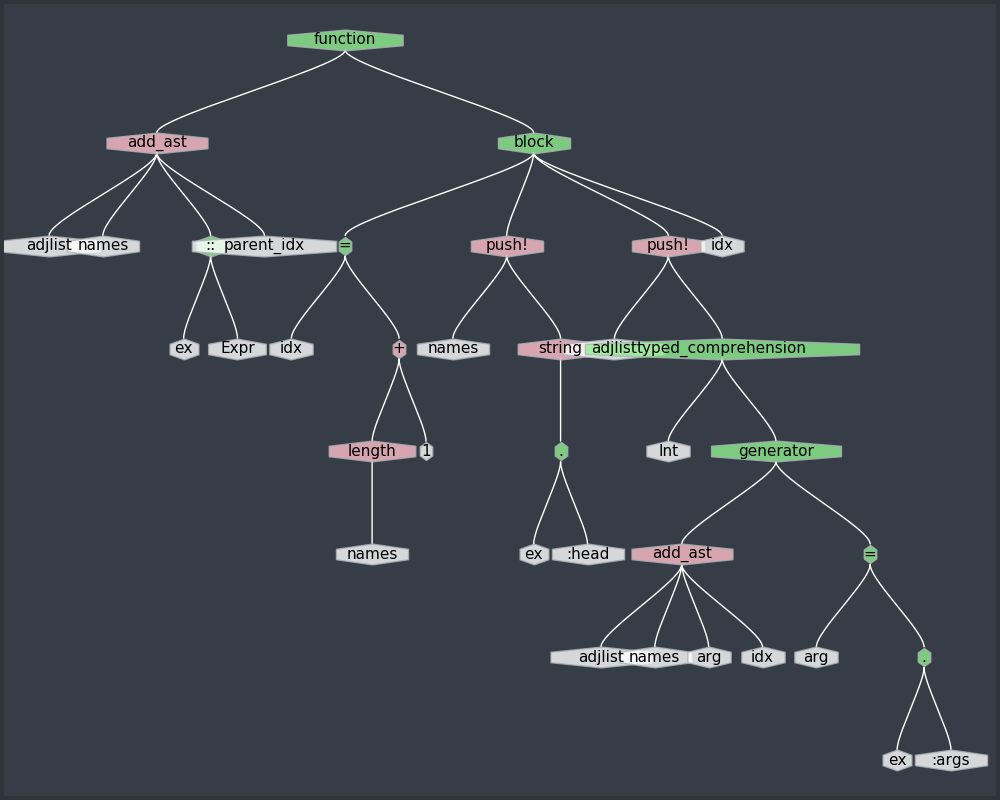

In [19]:
plot(code; kw...)

In [25]:
code = :(
function transform!{T}(act::Activation{:softmax,T})
    val = forward!(act.input)
    out = act.output.val
    for i=1:act.n
        out[i] = exp(val[i])
    end
    s = one(T) / sum(out)
    for i=1:act.n
        out[i] *= s
    end
    out
end
);


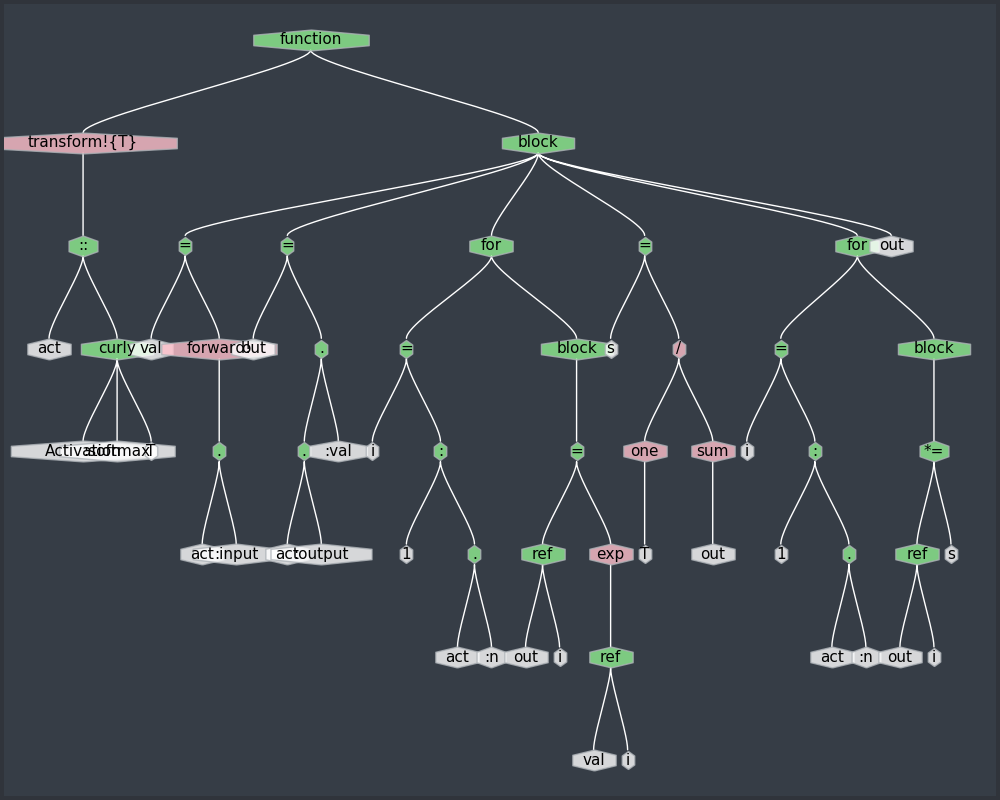

In [26]:
plot(code; kw...)

In [22]:
code = :(
function factorize{T}(A::StridedMatrix{T})
    m, n = size(A)
    if m == n
        if m == 1 return A[1] end
        utri    = true
        utri1   = true
        herm    = true
        sym     = true
        for j = 1:n-1, i = j+1:m
            if utri1
                if A[i,j] != 0
                    utri1 = i == j + 1
                    utri = false
                end
            end
            if sym
                sym &= A[i,j] == A[j,i]
            end
            if herm
                herm &= A[i,j] == conj(A[j,i])
            end
            if !(utri1|herm|sym) break end
        end
        ltri = true
        ltri1 = true
        for j = 3:n, i = 1:j-2
            ltri1 &= A[i,j] == 0
            if !ltri1 break end
        end
        if ltri1
            for i = 1:n-1
                if A[i,i+1] != 0
                    ltri &= false
                    break
                end
            end
            if ltri
                if utri
                    return Diagonal(A)
                end
                if utri1
                    return Bidiagonal(diag(A), diag(A, -1), false)
                end
                return LowerTriangular(A)
            end
            if utri
                return Bidiagonal(diag(A), diag(A, 1), true)
            end
            if utri1
                if (herm & (T <: Complex)) | sym
                    try
                        return ldltfact!(SymTridiagonal(diag(A), diag(A, -1)))
                    end
                end
                return lufact(Tridiagonal(diag(A, -1), diag(A), diag(A, 1)))
            end
        end
        if utri
            return UpperTriangular(A)
        end
        if herm
            try
                return cholfact(A)
            end
            return factorize(Hermitian(A))
        end
        if sym
            return factorize(Symmetric(A))
        end
        return lufact(A)
    end
    qrfact(A, Val{true})
end
);

In [27]:
png("/tmp/tmp")

In [17]:
ylims()

(-72.925,40.925)